In [50]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [51]:

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../Training",
   shuffle=True,
   image_size = (IMAGE_SIZE, IMAGE_SIZE) ,
   batch_size = BATCH_SIZE
)


Found 3251 files belonging to 3 classes.


In [52]:
class_names = dataset.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [53]:
len(dataset)

102

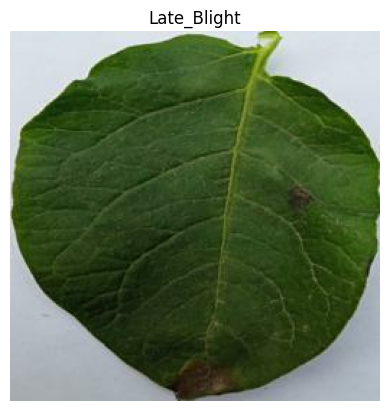

In [54]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    # print(image_batch[0].numpy())
    # print(label_batch.numpy())

In [55]:
# 80 training
train_size = 0.8
len(dataset)*train_size
# dataset.take(10)

81.60000000000001

In [56]:
train_ds = dataset.take(81)
len(train_ds)

81

In [57]:
test_ds = dataset.skip(81)
len(test_ds)

21

In [58]:
# for validation 10% of datset
val_size = 0.1
len(dataset)*val_size

10.200000000000001

In [61]:
val_ds = test_ds.take(10)
len(val_ds)

10

In [62]:
test_ds = test_ds.skip(10)
len(test_ds)

1

In [63]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [64]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [65]:
len(train_ds)

81

In [66]:
len(val_ds)

10

In [67]:
len(test_ds)

11

In [69]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [71]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [73]:
# rotated image we use data augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [74]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [76]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [78]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
81/81 [==============================] - 550s 7s/step - loss: 0.3143 - accuracy: 0.8872 - val_loss: 0.4176 - val_accuracy: 0.8625
Epoch 2/10
81/81 [==============================] - 518s 6s/step - loss: 0.3375 - accuracy: 0.8755 - val_loss: 0.3310 - val_accuracy: 0.8938
Epoch 3/10
81/81 [==============================] - 414s 5s/step - loss: 0.3021 - accuracy: 0.8910 - val_loss: 0.2887 - val_accuracy: 0.8969
Epoch 4/10
81/81 [==============================] - 321s 4s/step - loss: 0.2717 - accuracy: 0.8934 - val_loss: 0.3305 - val_accuracy: 0.8781
Epoch 5/10
81/81 [==============================] - 482s 6s/step - loss: 0.2626 - accuracy: 0.8980 - val_loss: 0.2250 - val_accuracy: 0.9250
Epoch 6/10
81/81 [==============================] - 262s 3s/step - loss: 0.4097 - accuracy: 0.8465 - val_loss: 0.2655 - val_accuracy: 0.9281
Epoch 7/10
81/81 [==============================] - 226s 3s/step - loss: 0.2358 - accuracy: 0.9085 - val_loss: 0.3635 - val_accuracy: 0.8813
Epoch 8/10
81

In [80]:
scores = model.evaluate(test_ds)

11/11 [==============================] - 8s 666ms/step - loss: 0.2485 - accuracy: 0.9062


In [84]:
history.params
EPOCHS = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

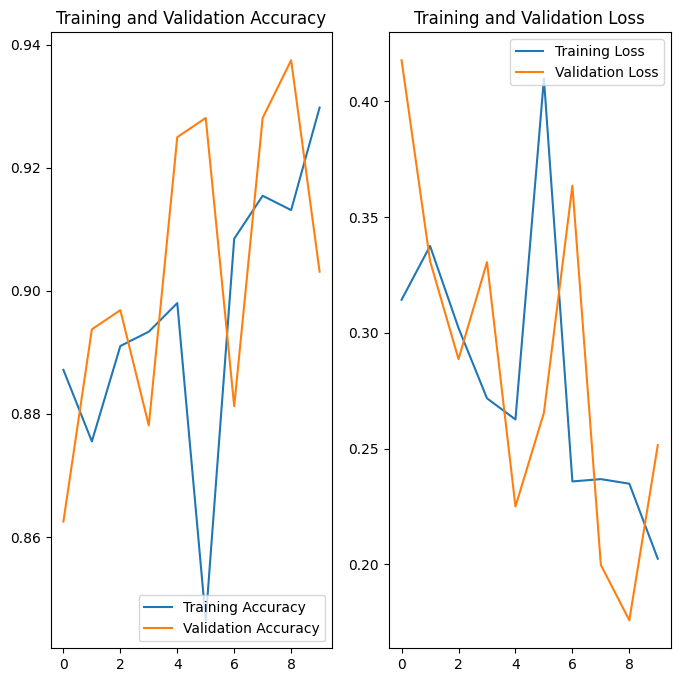

In [85]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

NameError: name 'test_ds' is not defined

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 55ms/step


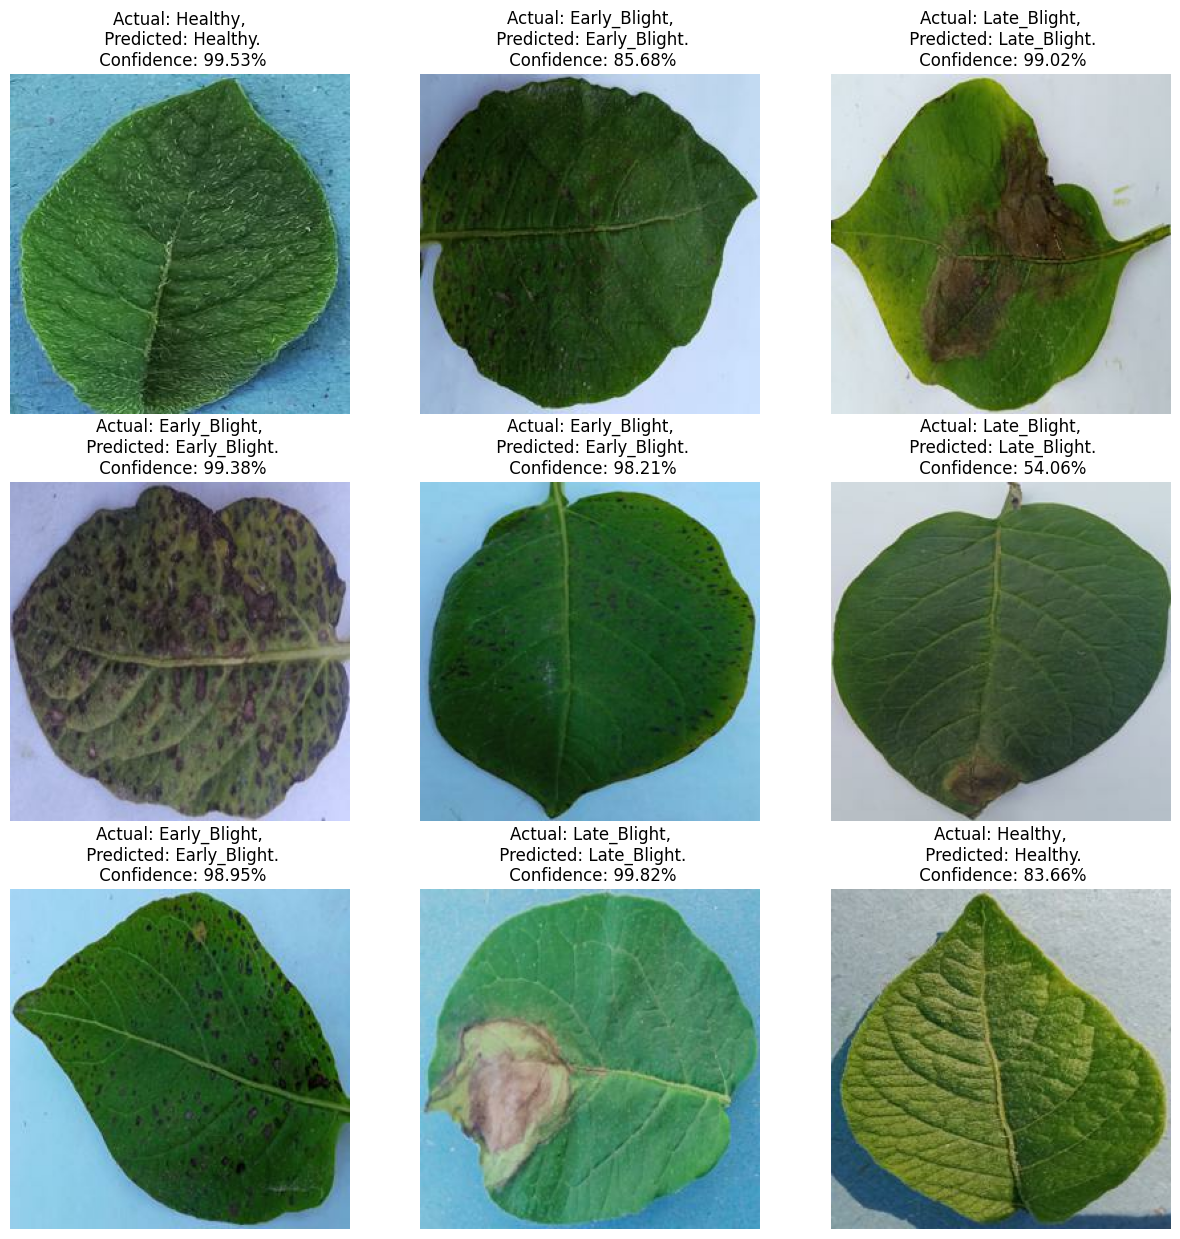

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("../model/") + [0]])+1
model.save(f"../model/{model_version}")
# model.save("../potatoes.h5") 

INFO:tensorflow:Assets written to: ../model/1\assets


INFO:tensorflow:Assets written to: ../model/1\assets
